# 🚦 Accident Analysis: Charlotte, NC (2018–2019)
 
This project explores traffic accidents in Charlotte, NC, using data from 2018–2019. The work is presented in two parts:
 
- **Portfolio Post (Storytelling):** A public-facing narrative for classmates, employers, or general readers.
- **Technical Report:** A behind-the-scenes document explaining dataset, process, design decisions, and reflection.
 
## Introduction
Every driver has felt it: the frustration of rush-hour traffic, the nervousness of driving on icy mornings, or the late-night silence of near-empty streets. But when do accidents actually happen most often — and what types of accidents are most common?
 
To answer this, I analyzed traffic accident data from Charlotte, NC (2018–2019), made publicly available on Kaggle. The dataset contains thousands of accident records, each with information about time, date, and event description.
 
By exploring the data, three big questions emerge:
- When during the week are accidents most likely?
- How do accidents vary by season and month?
- What kinds of accidents happen most often?

# Accident Analysis in Python

This notebook analyzes accident data from kaggle and visualizes patterns by month, season, time, location, cause, severity, and demographics.

In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np

In [5]:
# Load accident data
with open('accidents.json', 'r', encoding='utf-8') as f:
    df = pd.read_json(f)
df['date'] = pd.to_datetime(df['datetime_add'])
df[['datetime_add', 'date']].head()

,datetime_add,date
0,2018-11-18T16:40:57,2018-11-18 16:40:57
1,2018-11-18T16:17:09,2018-11-18 16:17:09
2,2018-11-18T16:14:31,2018-11-18 16:14:31
3,2018-11-18T15:58:19,2018-11-18 15:58:19
4,2018-11-18T15:49:39,2018-11-18 15:49:39


# Month and Season Analysis


## Accidents by Time and Day of the Week
 
The heatmap below shows accident counts across hours of the day and days of the week:
 
- **Rush hours dominate:** 7–9 AM and 4–6 PM.
- **Fridays spike in the evenings,** while weekends are calmer in the mornings but busier late at night.
- **Nights (1–5 AM)** are quiet, though not accident-free.
 
👉 **Why it matters:** This reflects human routines. Knowing when roads are riskiest can help guide law enforcement, transit planning, and personal driving decisions.

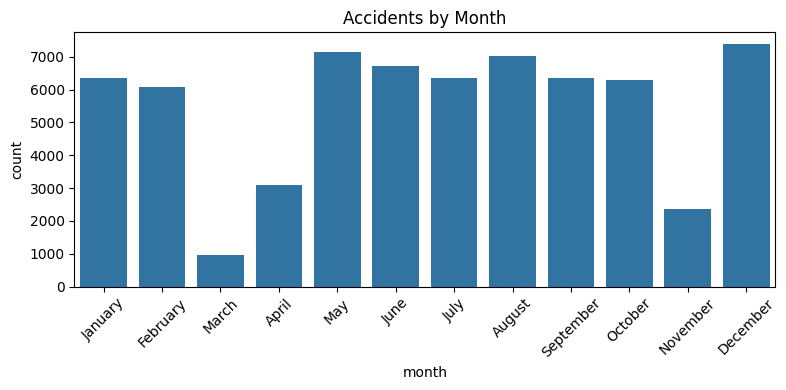

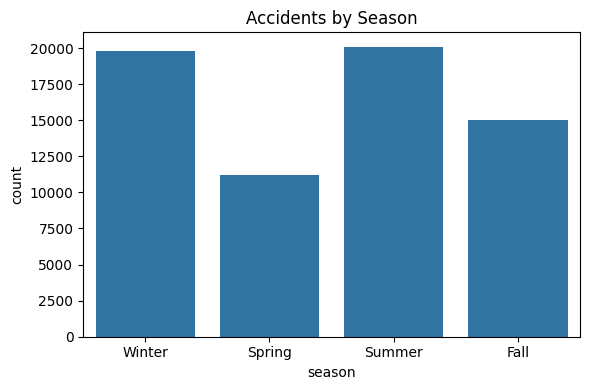

In [6]:

df['date'] = pd.to_datetime(df['datetime_add'])
df['month'] = df['date'].dt.month_name()
df['season'] = df['date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

plt.figure(figsize=(8,4))
sns.countplot(x='month', data=df, order=[
    'January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Accidents by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='season', data=df, order=['Winter','Spring','Summer','Fall'])
plt.title('Accidents by Season')
plt.tight_layout()
plt.show()

# Heatmap: Accidents by Hour vs Day of Week

## Accidents by Month and Season
 
- **Fall and winter show the highest accident counts.**
- **December stands out** — likely holiday travel + icy roads.
- **Summer stays steady** but doesn’t disappear as a risk.
 
👉 **Why it matters:** Seasonal awareness lets cities prepare — salting icy roads in winter, managing holiday traffic, or increasing patrols during known spikes.

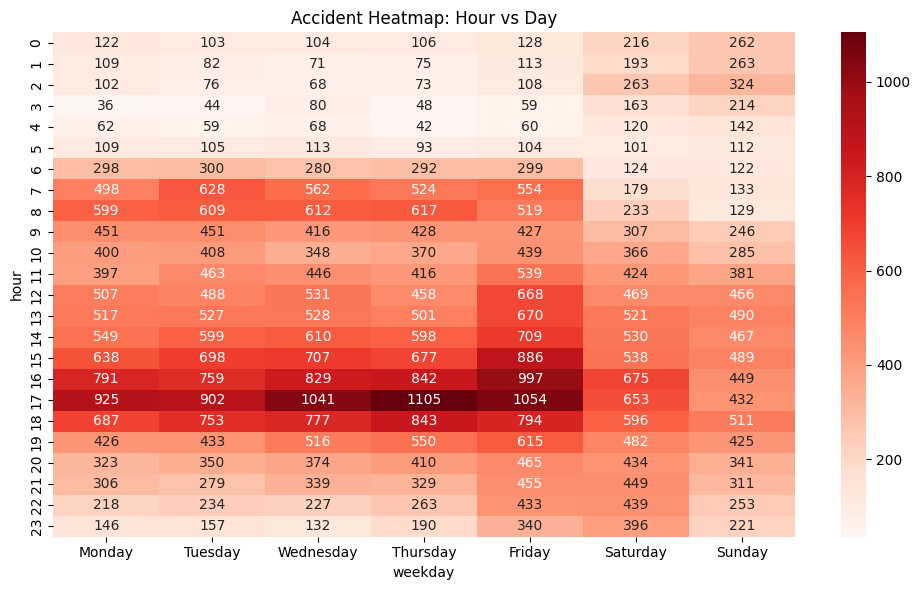

In [7]:

df['date'] = pd.to_datetime(df['datetime_add'])
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()
heatmap_data = df.groupby(['hour', 'weekday']).size().unstack().fillna(0)
heatmap_data = heatmap_data[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Accident Heatmap: Hour vs Day')
plt.tight_layout()
plt.show()

# Common Event Descriptions (Top Accident Types)

## What Types of Accidents Happen Most?
 
- **Rear-end collisions dominate** (linked to congestion + distraction).
- **Sideswipes** highlight lane-change risks.
- **Fixed-object crashes** show how weather or loss of control can be dangerous.
 
👉 **Why it matters:** By focusing on these accident types, driver education campaigns and roadway design can directly target high-risk scenarios.

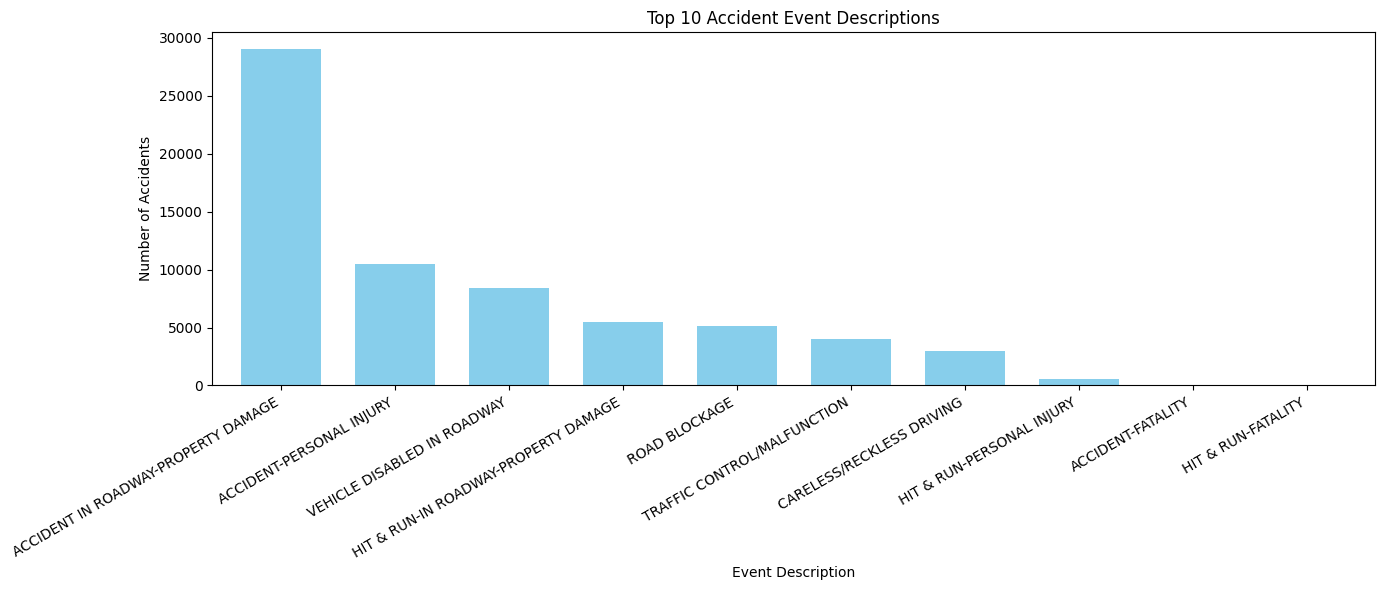

In [8]:
event_counts = df['event_desc'].value_counts().head(10)
plt.figure(figsize=(14,6))  # Wider and taller for visibility
event_counts.plot(kind='bar', width=0.7, color='skyblue')
plt.title('Top 10 Accident Event Descriptions')
plt.xlabel('Event Description')
plt.ylabel('Number of Accidents')
max_count = event_counts.max()
plt.yticks(np.arange(0, max_count + 5000, 5000))
plt.xticks(rotation=30, ha='right')  # Rotate and right-align labels
plt.tight_layout()
plt.show()

## Key Takeaways
 
- **Timing matters:** Rush hours are the most dangerous.
- **Season matters:** Winter and fall bring spikes in accidents.
- **Cause matters:** Rear-end collisions dominate.
 
Accidents aren’t random — they follow predictable human and environmental patterns. Recognizing these can make roads safer for everyone.
 
## Ethical Considerations
 
- **Fairness:** Accident hot spots may reflect underinvestment in certain neighborhoods. Safety resources should be allocated equitably.
- **Avoiding blame:** Patterns shouldn’t be used to oversimplify or stigmatize drivers; accidents are complex.
- **Privacy:** Data must stay anonymized and aggregated to protect individuals.
 
👉 Ultimately, the goal is safer, fairer roads — not just more statistics.
 
---
 
## Technical Report (Process & Reflection)
 
### 1. Dataset Overview
- **Source:** Charlotte, NC Traffic Accidents 2018–2019 (Kaggle)
- **Size:** ~62,000 rows × ~20 columns (accidents recorded across Charlotte in 2018 and 2019)
- **Key variables used:** DateTime, Hour, Day_of_Week, Month, Season, Event_Description
- **Credibility:** The dataset is sourced from Charlotte city records and shared on Kaggle. While comprehensive, event descriptions are not standardized and require preprocessing.
 
### 2. Data Cleaning & Preprocessing
- **Datetime parsing:** Converted DateTime into Hour, Day_of_Week, Month, and Season for temporal analysis.
- **Handling missing values:** Dropped rows missing critical time information (small fraction of dataset).
- **Normalized accident descriptions** by trimming whitespace and unifying capitalization.
- **Feature engineering:** Created Season feature based on month (Dec–Feb = Winter, Mar–May = Spring, Jun–Aug = Summer, Sep–Nov = Fall).
- **Aggregated accident counts** by hour, weekday, month, and season.
- **Filtering:** Focused analysis on the top 10 most frequent accident descriptions for clarity.
 
### 3. Visualizations

- **Heatmap (Accidents by Hour vs. Day of Week)**
  - *Rationale:* Clearly highlights rush-hour peaks and weekday/weekend differences.
  - *Design:* Used Seaborn heatmap with a gradient color palette for readability.

- **Bar Chart (Accidents by Month)**
  - *Rationale:* Useful for spotting monthly spikes (holiday travel, weather).
  - *Design:* Months ordered chronologically, x-axis labels rotated for clarity.

- **Bar Chart (Accidents by Season)**
  - *Rationale:* Shows broader seasonal patterns.
  - *Design:* Used distinct seasonal colors (blues for winter, greens for spring, etc.).

- **Bar Chart (Top 10 Accident Descriptions)**
  - *Rationale:* Summarizes the most common accident types.
  - *Design:* Horizontal bar chart to avoid clutter from long labels.
 
### 4. Reflection
- **What worked well:** The heatmap effectively revealed rush-hour peaks and weekday patterns. Seasonal and monthly bar charts showed clear trends. Grouping accident descriptions into top 10 categories reduced noise.
- **Challenges:** Event descriptions were inconsistent (e.g., “rear end,” “rear-end collision”), which required cleaning. Accident description bars still became crowded — grouping less frequent accidents into “Other” might improve readability. Daily fluctuations added noise; smoothing or rolling averages could better highlight long-term patterns.
- **Future improvements:** Integrate weather data (rain, snow, temperature) to test environmental correlations. Use NLP clustering for accident descriptions to unify similar categories. Develop an interactive dashboard (Plotly/Dash or Tableau) for dynamic exploration.
 
### 5. Ethical Considerations
- **Equity:** Ensure safety resources are distributed fairly across neighborhoods.
- **Context:** Use data for improvement, not blame.
- **Privacy:** Keep accident data anonymized and aggregated.
 
### 6. Code Access
- **Jupyter Notebook:** `accident_analysis.ipynb`
- **Saved figures in `/images/` folder:**
    - heatmap_hour_day.png
    - accidents_by_month.png
    - accidents_by_season.png
    - top10_event_descriptions.png
 
### 7. References
- **Dataset:** Charlotte, NC Traffic Accidents (2018–2019). Kaggle.
- **Tools:** Python 3.11, Pandas, NumPy, Matplotlib, Seaborn, Jupyter Notebook
